In [16]:
import pandas as pd 

df = pd.read_csv('tcs_stock_2018-05-26.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2013-01-01,1266.95,1267.9,1260.00,1262.30,1264.15,254790.0,3220.75
1,2013-01-02,1267.00,1272.4,1255.55,1262.95,1263.30,940123.0,11885.37
2,2013-01-03,1265.00,1284.0,1259.95,1282.90,1280.60,1317565.0,16821.01
3,2013-01-04,1285.00,1301.0,1280.90,1299.00,1299.20,2614380.0,33794.17
4,2013-01-07,1300.00,1304.0,1290.25,1295.00,1294.85,910376.0,11799.61


In [17]:
# 将date 字段设置为索引
df = df.set_index('Date')
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-01-01,1266.95,1267.9,1260.00,1262.30,1264.15,254790.0,3220.75
2013-01-02,1267.00,1272.4,1255.55,1262.95,1263.30,940123.0,11885.37
2013-01-03,1265.00,1284.0,1259.95,1282.90,1280.60,1317565.0,16821.01
2013-01-04,1285.00,1301.0,1280.90,1299.00,1299.20,2614380.0,33794.17
2013-01-07,1300.00,1304.0,1290.25,1295.00,1294.85,910376.0,11799.61


In [18]:
# 弃用一些字段
drop_columns = ['Last','Total Trade Quantity','Turnover (Lacs)']
df = df.drop(drop_columns,axis=1)
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,1266.95,1267.9,1260.00,1264.15
2013-01-02,1267.00,1272.4,1255.55,1263.30
2013-01-03,1265.00,1284.0,1259.95,1280.60
2013-01-04,1285.00,1301.0,1280.90,1299.20
2013-01-07,1300.00,1304.0,1290.25,1294.85


In [19]:
df['High'] = df['High'] / 10000
df['Open'] = df['Open'] / 10000
df['Low'] = df['Low'] / 10000
df['Close'] = df['Close'] / 10000
print(df.head())

                Open     High       Low     Close
Date                                             
2013-01-01  0.126695  0.12679  0.126000  0.126415
2013-01-02  0.126700  0.12724  0.125555  0.126330
2013-01-03  0.126500  0.12840  0.125995  0.128060
2013-01-04  0.128500  0.13010  0.128090  0.129920
2013-01-07  0.130000  0.13040  0.129025  0.129485


In [20]:
# 将dataframe 转化为 array
data = df.as_matrix()

C:\SoftDir\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

# 1 : 数据切分
result = []
time_steps = 6


for i in range(len(data)-time_steps):
    result.append(data[i:i+time_steps])

result = np.array(result)


# 训练集和测试集的数据量划分
train_size = int(0.8*len(result))

# 训练集切分
train = result[:train_size,:]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
   
x_test = result[train_size:,:-1]
y_test = result[train_size:,-1][:,-1]

feature_nums = len(df.columns)

# 数据重塑
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

 # 举例：用前5行数据，预测第6行的最后一个数据
# train
 #[[[0.126695 0.12679  0.126    0.126415]
#   [0.1267   0.12724  0.125555 0.12633 ]
#   [0.1265   0.1284   0.125995 0.12806 ]
#   [0.1285   0.1301   0.12809  0.12992 ]
#   [0.13     0.1304   0.129025 0.129485]
#   [0.1295   0.13043  0.12943  0.130025]]

# x_train
# [[[0.126695 0.12679  0.126    0.126415]
#   [0.1267   0.12724  0.125555 0.12633 ]
#   [0.1265   0.1284   0.125995 0.12806 ]
#   [0.1285   0.1301   0.12809  0.12992 ]
#   [0.13     0.1304   0.129025 0.129485]]

# y_train
#[0.130025]


X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


In [24]:
from __future__ import print_function
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from keras.layers.recurrent import LSTM
from keras import losses
from keras import optimizers

def build_model(input):
        model = Sequential()
        model.add(LSTM(128, input_shape=(input[0], input[1]), return_sequences=True))
        model.add(LSTM(32, input_shape=(input[0], input[1]), return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model
              
model = build_model([5,4,1])
#Summary of the Model
print(model.summary())
              
              

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 128)            68096     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 89,249
Trainable params: 89,249
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=35,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Instructions for updating:
Use tf.cast instead.
Train on 848 samples, validate on 212 samples
Epoch 1/35
 - 1s - loss: 0.0492 - mean_absolute_error: 0.2184 - val_loss: 0.0517 - val_mean_absolute_error: 0.2271
Epoch 2/35
 - 0s - loss: 0.0421 - mean_absolute_error: 0.2014 - val_loss: 0.0403 - val_mean_absolute_error: 0.2003
Epoch 3/35
 - 0s - loss: 0.0273 - mean_absolute_error: 0.1605 - val_loss: 0.0154 - val_mean_absolute_error: 0.1237
Epoch 4/35
 - 0s - loss: 0.0059 - mean_absolute_error: 0.0648 - val_loss: 0.0033 - val_mean_absolute_error: 0.0569
Epoch 5/35
 - 0s - loss: 0.0054 - mean_absolute_error: 0.0603 - val_loss: 3.5093e-04 - val_mean_absolute_error: 0.0163
Epoch 6/35
 - 0s - loss: 0.0026 - mean_absolute_error: 0.0414 - val_loss: 0.0028 - val_mean_absolute_error: 0.0522
Epoch 7/35
 - 0s - loss: 0.0027 - mean_absolute_error: 0.0423 - val_loss: 5.2541e-04 - val_mean_absolute_error: 0.0206
Epoch 8/35
 - 0s - loss: 0.0020 - mean_absolute_error: 0.0367 - val_loss: 1.1027e-04 - val_me

In [27]:
# 返回history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

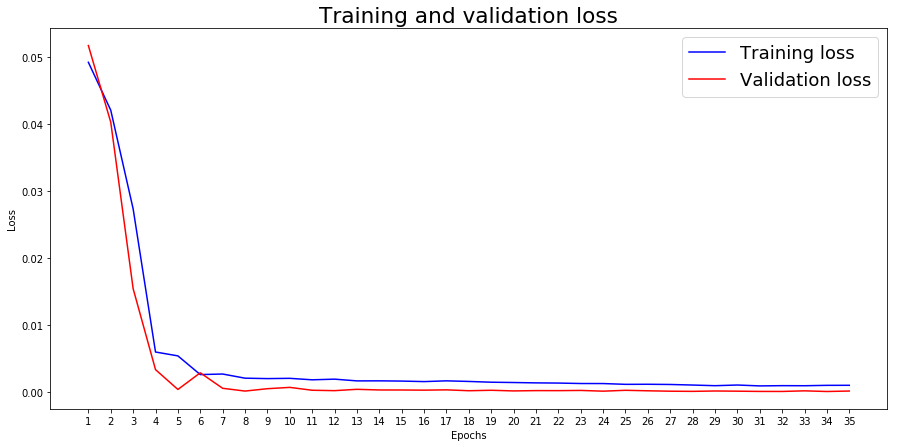

In [28]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

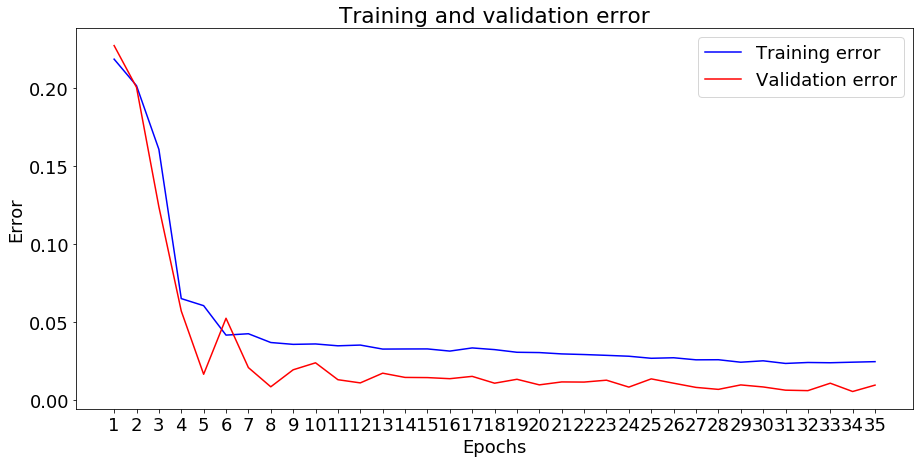

In [29]:
# 画出训练集和验证集的误差图像

mae = history_dict['mean_absolute_error']
vmae = history_dict['val_mean_absolute_error']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [30]:
model.metrics_names

['loss', 'mean_absolute_error']

In [31]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [32]:
#predicting values for y_test
p = model.predict(x_test)

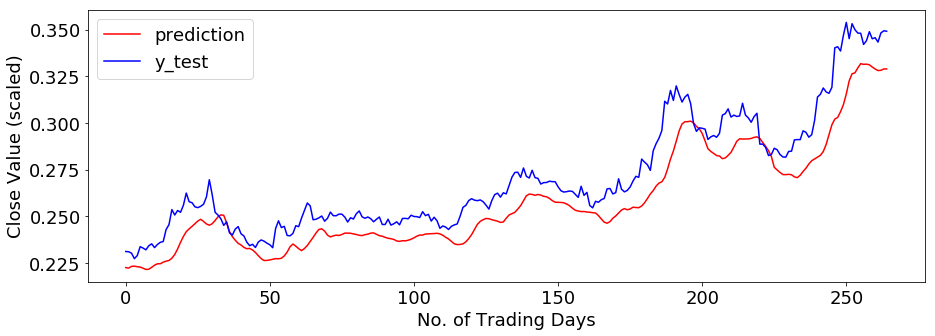

In [33]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [34]:
p1= model.predict(x_train)

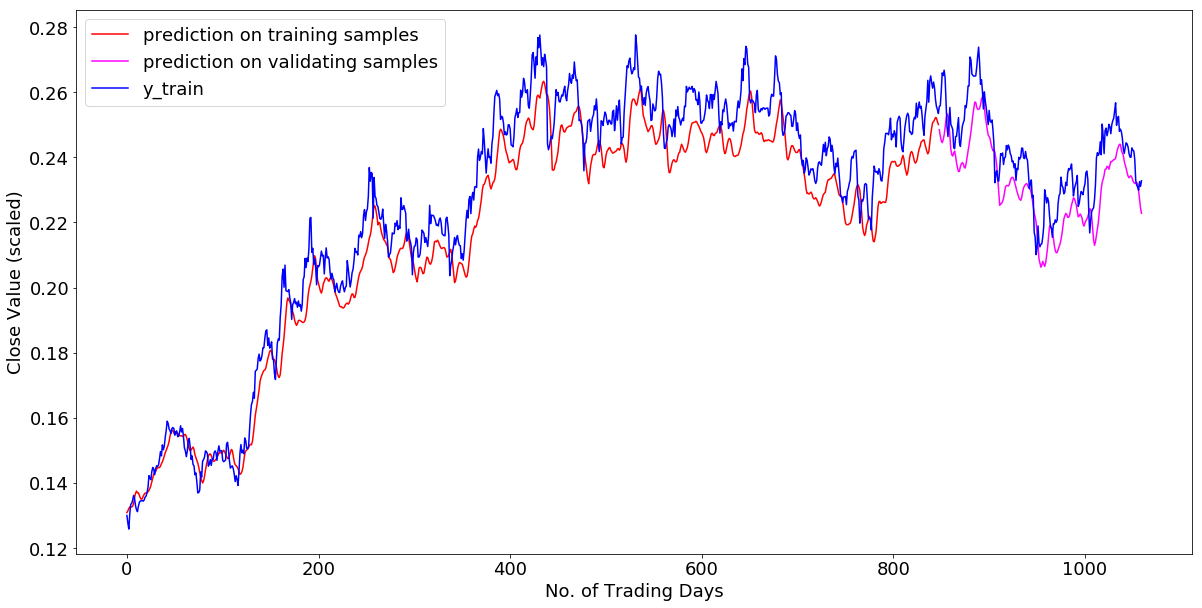

In [35]:
plt.plot(p1[:848],color='red', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()

In [36]:
y = y_test * 10000  # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模
y_pred = p.reshape(265)  # 测试集数据大小为265
y_pred = y_pred * 10000  # 原始数据经过除以10000进行缩放，因此乘以10000,返回到原始数据规模

In [37]:
from sklearn.metrics import mean_absolute_error

In [38]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.010444042 		 0.008804569 		 0.015058810 		 0.012934401


In [39]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 129.344014225 			 4.669007667


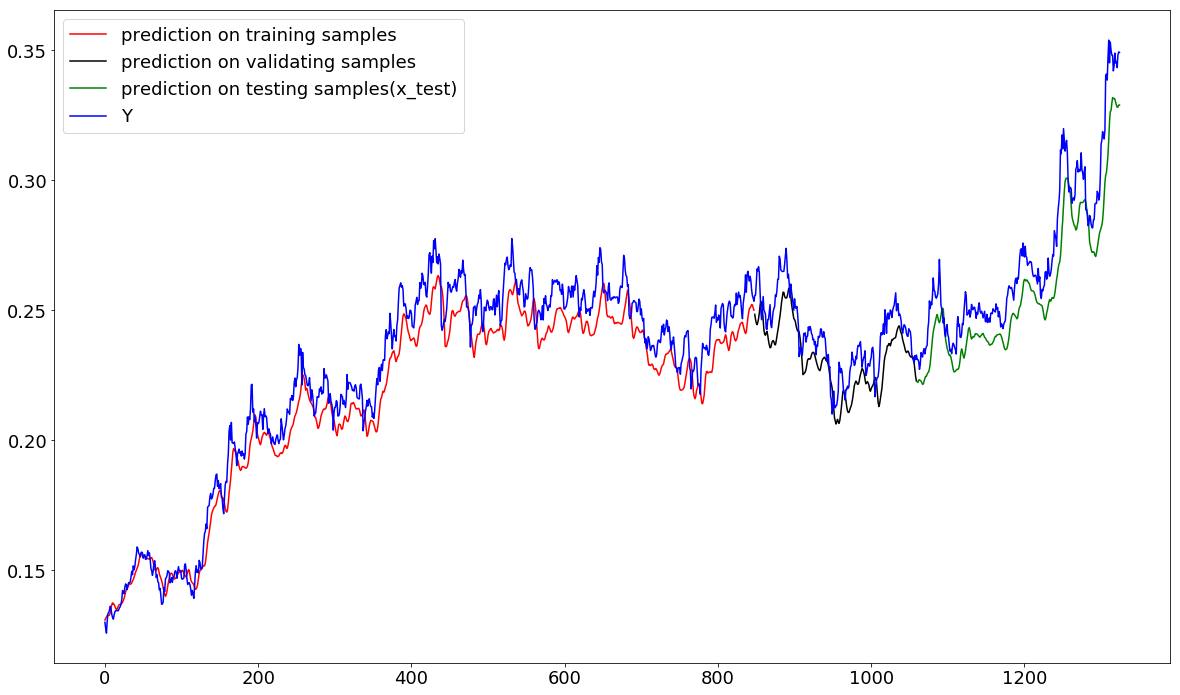

In [40]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'black',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'green',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()